# Get the Data


In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [3]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AREA_UNIQUE,AGE\r\n1004,2011,131,1,1,3,Abnormal,1,1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000,Karapakkam,44\r\n909,2012,70,1,1,3,Abnormal,1,1995,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200,Adayar,17\r\n1226,2009,84,1,1,3,Abnormal,1,1992,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250,Karapakkam,17\r\n1220,2014,36,2,1,4,Partial,0,1988,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.32,409027,198316,12394750,Chrompet,26\r\n1167,2007,137,1,1,3,Partial,0,1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.67,263152,33955,8488790,Chrompet,28\r\n771,2011,175,1,1,2,Adjland,0,2009,Others,NoSeWa,Paved,RM,2.9,3.7,4,3.55,257578,33236,8308970,Chrompet,2\r\n1196,2010,137,1,1,3,Family,0,1979,Others,NoSeWa,No Access,RL,2.1,2.5,2.1,2.26,289554,

In [6]:
train = pd.read_csv ("data.csv")

##Take a Quick Look at the Data Structure

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       7109 non-null   int64  
 1   DATE_SALE      7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7108 non-null   float64
 4   N_BATHROOM     7104 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   int64  
 8   DATE_BUILD     7109 non-null   int64  
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7061 non-null   float64
 17  REG_FEE        7109 non-null   int64  
 18  COMMIS  

In [9]:
train.tail()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AREA_UNIQUE,AGE
7104,1611,2013,144,1.0,1.0,4,Partial,1,1962,Others,NoSeWa,Paved,RM,3.2,3.7,2.9,3.205,432288,209172,13944780,Anna_Nagar,51
7105,1733,2010,191,1.0,1.0,4,Abnormal,1,1995,Commercial,NoSeWa,No Access,RL,3.4,3.7,2.1,2.890,702058,312026,19501600,T_Nagar,15
7106,1462,2010,68,2.0,2.0,4,Family,0,1978,Others,NoSeWa,Gravel,RM,2.7,3.3,3.6,3.240,356716,178358,9387250,Karapakkam,32
7107,1614,2006,152,2.0,1.0,4,Normal_sale,0,1977,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,Velachery,29
7108,1896,2005,156,3.0,2.0,5,Partial,1,1961,Others,ELO,Paved,I,3.1,3.5,4.3,3.640,349177,79812,9976480,Velachery,44


In [10]:
##Converting 'Registration_Date' feature to datetime type
#train['DATE_SALE'] = pd.to_datetime(train['DATE_SALE'],format="%m/%d/%Y")

##Converting 'Registration_Date' feature to datetime type
#train['DATE_BUILD'] = pd.to_datetime(train['DATE_BUILD'],format="%m/%d/%Y")

In [11]:
train.describe()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,2009.768181,99.603179,1.637029,1.213260,3.688704,0.504572,1985.491912,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,24.276270
std,457.410902,2.205979,57.403110,0.802902,0.409639,1.019099,0.500014,12.648859,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06,12.823865
min,500.000000,2004.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1949.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,-4.000000
25%,993.000000,2008.000000,50.000000,1.000000,1.000000,3.000000,0.000000,1976.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,14.000000
50%,1373.000000,2010.000000,99.000000,1.000000,1.000000,4.000000,1.000000,1986.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07,24.000000
75%,1744.000000,2011.000000,148.000000,2.000000,1.000000,4.000000,1.000000,1996.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07,34.000000
max,2500.000000,2015.000000,200.000000,4.000000,2.000000,6.000000,1.000000,2010.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,64.000000


In [12]:
train.isnull().sum()

INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
AREA_UNIQUE       0
AGE               0
dtype: int64

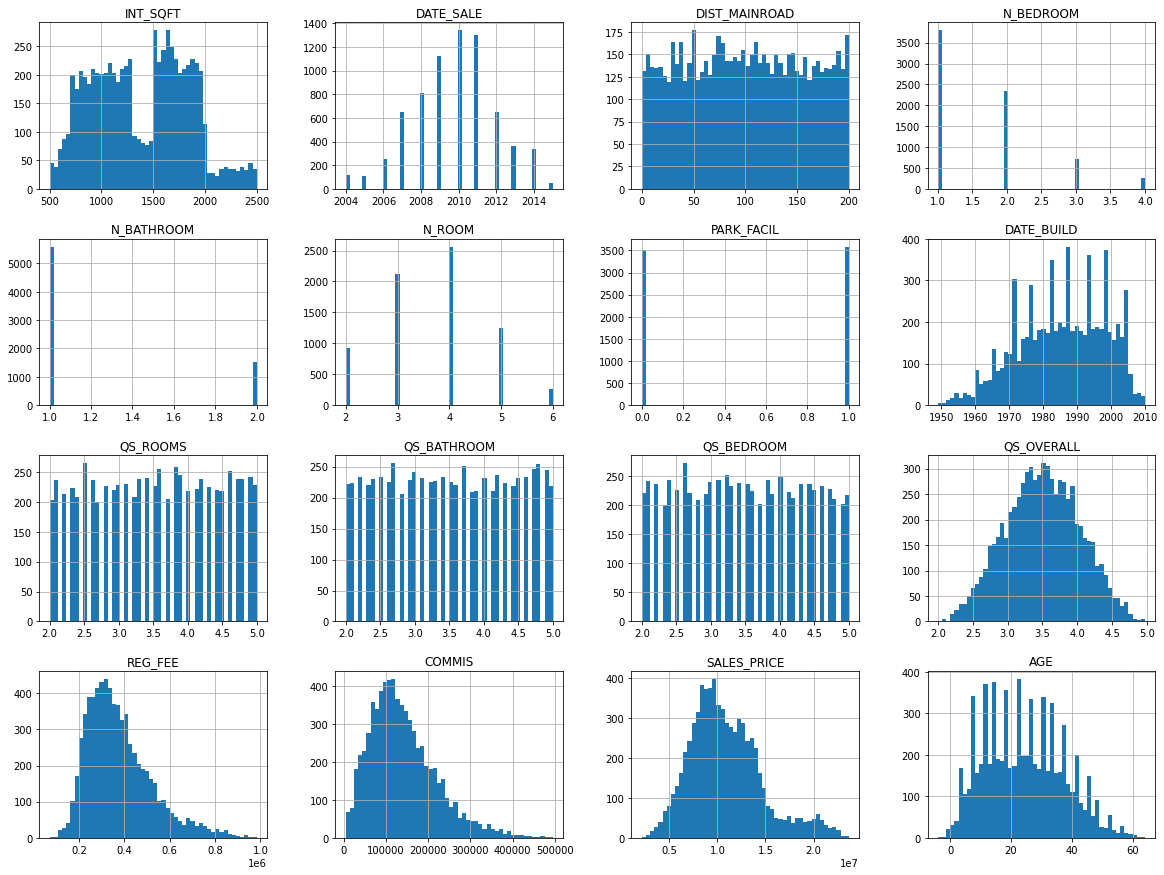

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

# Create a Test Set

In [14]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [16]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = split_train_test(train, 0.2)
len(train_set)

5688

In [18]:
len(test_set)

1421

In [19]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [21]:
train_with_id = train.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(train_with_id, 0.2, "index")

In [22]:
test_set.head()

,index,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AREA_UNIQUE,AGE
4,4,1167,2007,137,1.0,1.0,3,Partial,0,1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.67,263152,33955,8488790,Chrompet,28
5,5,771,2011,175,1.0,1.0,2,Adjland,0,2009,Others,NoSeWa,Paved,RM,2.9,3.7,4.0,3.55,257578,33236,8308970,Chrompet,2
11,11,1136,2008,69,1.0,1.0,3,Normal_sale,1,1972,Others,AllPub,Paved,A,4.6,2.6,2.9,3.35,323214,49725,8287550,Adayar,36
20,20,2492,2009,113,4.0,2.0,6,Abnormal,0,2009,Commercial,NoSeWa,Paved,RL,4.3,4.6,3.8,4.19,917550,224706,18725520,KK_Nagar,0
23,23,1412,2010,28,2.0,2.0,4,Adjland,0,1994,House,ELO,Gravel,RL,4.1,2.9,3.1,3.34,251370,192717,8379000,Karapakkam,16


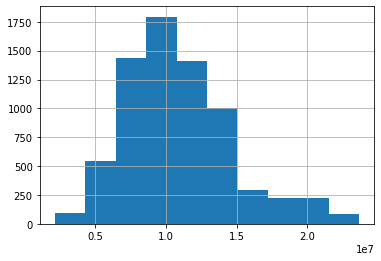

In [23]:
train["SALES_PRICE"].hist()

In [24]:
train["Sales_cat"] = pd.cut(train["SALES_PRICE"],
                               bins=[2000000., 4000000., 8000000.0, 10000000.0, 20000000.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [25]:
train["Sales_cat"].value_counts()

4    3575
3    1740
2    1486
5     238
1      70
Name: Sales_cat, dtype: int64

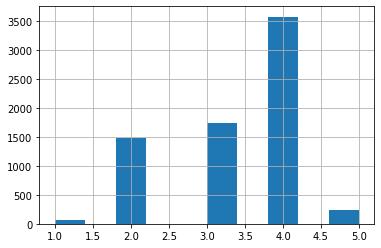

In [26]:
train["Sales_cat"].hist()

In [27]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(train, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~train.isin([np.nan, np.inf, -np.inf]).any(1)
    return train[indices_to_keep].astype(np.float64)

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["Sales_cat"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

In [29]:
strat_test_set["Sales_cat"].value_counts() / len(strat_test_set)

4    0.502813
3    0.244726
2    0.208861
5    0.033755
1    0.009845
Name: Sales_cat, dtype: float64

In [30]:
train["Sales_cat"].value_counts() / len(train)

4    0.502884
3    0.244760
2    0.209031
5    0.033479
1    0.009847
Name: Sales_cat, dtype: float64

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Sales_cat", axis=1, inplace=True)

# EDA - Discover and Visualize the Data to Gain Insights

In [32]:
train = strat_train_set.copy()

## Univariate

In [33]:
from google.colab import files
files.upload()

Saving data.csv to data (1).csv


{'data.csv': b'INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AREA_UNIQUE,AGE\r\n1004,2011,131,1,1,3,Abnormal,1,1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000,Karapakkam,44\r\n909,2012,70,1,1,3,Abnormal,1,1995,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200,Adayar,17\r\n1226,2009,84,1,1,3,Abnormal,1,1992,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250,Karapakkam,17\r\n1220,2014,36,2,1,4,Partial,0,1988,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.32,409027,198316,12394750,Chrompet,26\r\n1167,2007,137,1,1,3,Partial,0,1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.67,263152,33955,8488790,Chrompet,28\r\n771,2011,175,1,1,2,Adjland,0,2009,Others,NoSeWa,Paved,RM,2.9,3.7,4,3.55,257578,33236,8308970,Chrompet,2\r\n1196,2010,137,1,1,3,Family,0,1979,Others,NoSeWa,No Access,RL,2.1,2.5,2.1,2.26,289554,

In [34]:
Vizdata = pd.read_csv ("data.csv")

In [35]:
import matplotlib.pyplot as plt

In [36]:
Anna_Nagar = Vizdata[Vizdata['AREA_UNIQUE']=='Anna_Nagar']
Adayar = Vizdata[Vizdata['AREA_UNIQUE']=='Adayar']
Chrompet = Vizdata[Vizdata['AREA_UNIQUE']=='Chrompet']
KK_Nagar = Vizdata[Vizdata['AREA_UNIQUE']=='KK_Nagar']
Karapakkam = Vizdata[Vizdata['AREA_UNIQUE']=='Karapakkam']
T_Nagar = Vizdata[Vizdata['AREA_UNIQUE']=='T_Nagar']
Velachery = Vizdata[Vizdata['AREA_UNIQUE']=='Velachey']

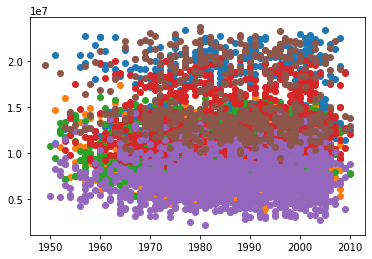

In [37]:
plt.plot(Anna_Nagar['DATE_BUILD'],Anna_Nagar['SALES_PRICE'], 'o')
plt.plot(Adayar['DATE_BUILD'], Adayar['SALES_PRICE'], 'o')
plt.plot(Chrompet['DATE_BUILD'],Chrompet['SALES_PRICE'], 'o')
plt.plot(KK_Nagar['DATE_BUILD'],KK_Nagar['SALES_PRICE'], 'o')
plt.plot(Karapakkam['DATE_BUILD'],Karapakkam['SALES_PRICE'], 'o')
plt.plot(T_Nagar['DATE_BUILD'],T_Nagar['SALES_PRICE'], 'o')
plt.plot(Velachery['DATE_BUILD'],Velachery['SALES_PRICE'], 'o')

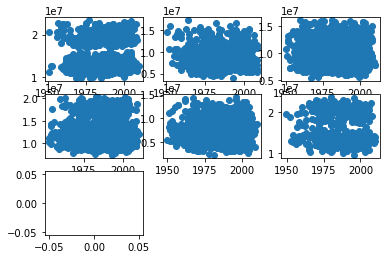

In [38]:
fig = plt.figure()
figsize=(20, 10)
axes1= fig.add_subplot(3,3,1)
axes2= fig.add_subplot(3,3,2)
axes3= fig.add_subplot(3,3,3)
axes4= fig.add_subplot(3,3,4)
axes5= fig.add_subplot(3,3,5)
axes6= fig.add_subplot(3,3,6)
axes7= fig.add_subplot(3,3,7)
axes1.plot(Anna_Nagar['DATE_BUILD'],Anna_Nagar['SALES_PRICE'], 'o')
axes2.plot(Adayar['DATE_BUILD'], Adayar['SALES_PRICE'], 'o')
axes3.plot(Chrompet['DATE_BUILD'],Chrompet['SALES_PRICE'], 'o')
axes4.plot(KK_Nagar['DATE_BUILD'],KK_Nagar['SALES_PRICE'], 'o')
axes5.plot(Karapakkam['DATE_BUILD'],Karapakkam['SALES_PRICE'], 'o')
axes6.plot(T_Nagar['DATE_BUILD'],T_Nagar['SALES_PRICE'], 'o')
axes7.plot(Velachery['DATE_BUILD'],Velachery['SALES_PRICE'], 'o')

In [39]:
Vizdata['AREA_UNIQUE'].unique()

array(['Karapakkam', 'Adayar', 'Chrompet', 'Velachery', 'Anna_Nagar',
       'KK_Nagar', 'T_Nagar'], dtype=object)

## Bivatiate

In [40]:
#pair_grid = sns.PairGrid(Vizdata)
#pair_grid = pair_grid.map_upper(sns.regplot)
#pair_grid = pair_grid.map_lower(sns.kdeplot)
#pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
#plt.show()

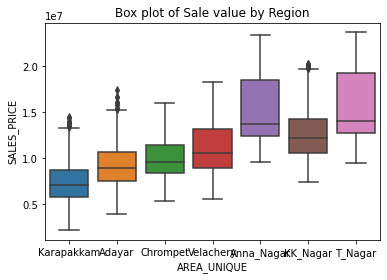

In [41]:
#Box Plot

box, ax=plt.subplots()
ax=sns.boxplot(x='AREA_UNIQUE', y='SALES_PRICE', data= Vizdata)
ax.set_title('Box plot of Sale value by Region')
ax.set_xlabel('AREA_UNIQUE')
ax.set_ylabel('SALES_PRICE')
plt.show()

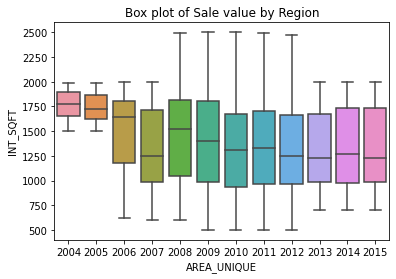

In [42]:
#Box Plot

box, ax=plt.subplots()
ax=sns.boxplot(x='DATE_SALE', y='INT_SQFT', data= Vizdata)
ax.set_title('Box plot of Sale value by Region')
ax.set_xlabel('AREA_UNIQUE')
ax.set_ylabel('INT_SQFT')
plt.show()

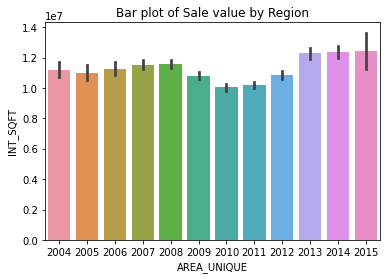

In [43]:
#Bor Plot

box, ax=plt.subplots()
ax=sns.barplot(x='DATE_SALE', y='SALES_PRICE', data= Vizdata)
ax.set_title('Bar plot of Sale value by Region')
ax.set_xlabel('AREA_UNIQUE')
ax.set_ylabel('INT_SQFT')
plt.show()

In [44]:
Vizdata["Sales_mean"] = Vizdata.groupby('AREA_UNIQUE')["SALES_PRICE"].transform('mean')
Vizdata.head()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AREA_UNIQUE,AGE,Sales_mean
0,1004,2011,131,1.0,1.0,3,Abnormal,1,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,380000,144400,7600000,Karapakkam,44,7.340100e+06
1,909,2012,70,1.0,1.0,3,Abnormal,1,1995,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200,Adayar,17,9.185668e+06
2,1226,2009,84,1.0,1.0,3,Abnormal,1,1992,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.29,237000,74063,7406250,Karapakkam,17,7.340100e+06
3,1220,2014,36,2.0,1.0,4,Partial,0,1988,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.32,409027,198316,12394750,Chrompet,26,1.001381e+07
4,1167,2007,137,1.0,1.0,3,Partial,0,1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.67,263152,33955,8488790,Chrompet,28,1.001381e+07


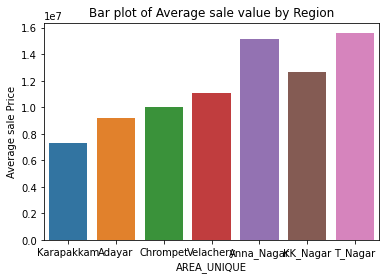

In [45]:
#Bar Plot

box, ax=plt.subplots()
ax=sns.barplot(x='AREA_UNIQUE', y='Sales_mean', data= Vizdata)
ax.set_title('Bar plot of Average sale value by Region')
ax.set_xlabel('AREA_UNIQUE')
ax.set_ylabel('Average sale Price')
plt.show()

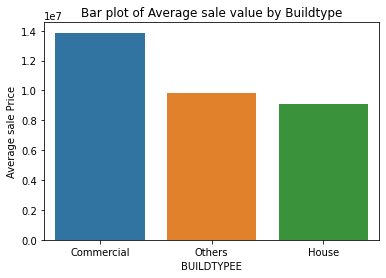

In [46]:
Vizdata["Sales_mean_Buildtype"] = Vizdata.groupby('BUILDTYPE')["SALES_PRICE"].transform('mean')
box, ax=plt.subplots()
ax=sns.barplot(x='BUILDTYPE', y='Sales_mean_Buildtype', data= Vizdata)
ax.set_title('Bar plot of Average sale value by Buildtype')
ax.set_xlabel('BUILDTYPEE')
ax.set_ylabel('Average sale Price')
plt.show()

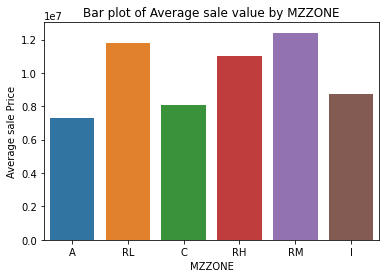

In [47]:
Vizdata["MZZONE_mean_Buildtype"] = Vizdata.groupby('MZZONE')["SALES_PRICE"].transform('mean')
box, ax=plt.subplots()
ax=sns.barplot(x='MZZONE', y='MZZONE_mean_Buildtype', data= Vizdata)
ax.set_title('Bar plot of Average sale value by MZZONE')
ax.set_xlabel('MZZONE')
ax.set_ylabel('Average sale Price')
plt.show()

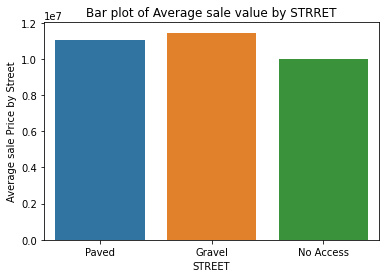

In [48]:
Vizdata["STREET_mean_Buildtype"] = Vizdata.groupby('STREET')["SALES_PRICE"].transform('mean')
box, ax=plt.subplots()
ax=sns.barplot(x='STREET', y='STREET_mean_Buildtype', data= Vizdata)
ax.set_title('Bar plot of Average sale value by STRRET')
ax.set_xlabel('STREET')
ax.set_ylabel('Average sale Price by Street')
plt.show()

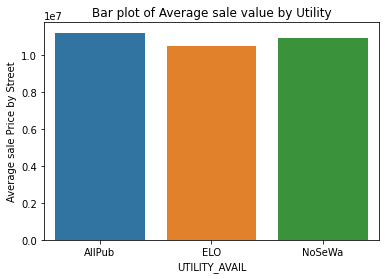

In [49]:
Vizdata["UTILITY_AVAIL_mean_Buildtype"] = Vizdata.groupby('UTILITY_AVAIL')["SALES_PRICE"].transform('mean')
box, ax=plt.subplots()
ax=sns.barplot(x='UTILITY_AVAIL', y='UTILITY_AVAIL_mean_Buildtype', data= Vizdata)
ax.set_title('Bar plot of Average sale value by Utility')
ax.set_xlabel('UTILITY_AVAIL')
ax.set_ylabel('Average sale Price by Street')
plt.show()

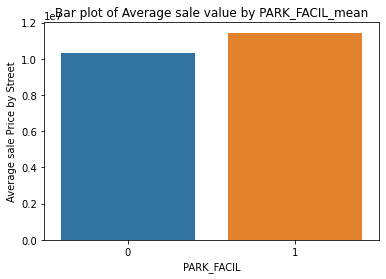

In [50]:
Vizdata["PARK_FACIL_mean"] = Vizdata.groupby('PARK_FACIL')["SALES_PRICE"].transform('mean')
box, ax=plt.subplots()
ax=sns.barplot(x='PARK_FACIL', y='PARK_FACIL_mean', data= Vizdata)
ax.set_title('Bar plot of Average sale value by PARK_FACIL_mean')
ax.set_xlabel('PARK_FACIL')
ax.set_ylabel('Average sale Price by Street')
plt.show()

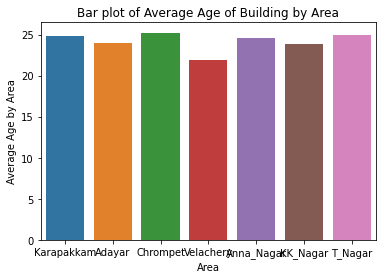

In [51]:
Vizdata["AGE_mean"] = Vizdata.groupby('AREA_UNIQUE')["AGE"].transform('mean')
box, ax=plt.subplots()
ax=sns.barplot(x='AREA_UNIQUE', y='AGE_mean', data= Vizdata)
ax.set_title('Bar plot of Average Age of Building by Area')
ax.set_xlabel('Area')
ax.set_ylabel('Average Age by Area')
plt.show()

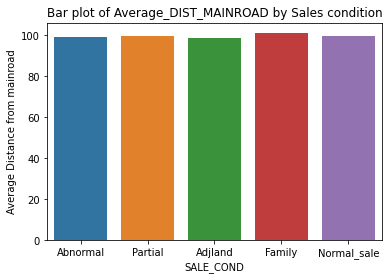

In [52]:
Vizdata["Average_DIST_MAINROAD"] = Vizdata.groupby('SALE_COND')["DIST_MAINROAD"].transform('mean')
box, ax=plt.subplots()
ax=sns.barplot(x='SALE_COND', y='Average_DIST_MAINROAD', data= Vizdata)
ax.set_title('Bar plot of Average_DIST_MAINROAD by Sales condition')
ax.set_xlabel('SALE_COND')
ax.set_ylabel('Average Distance from mainroad')
plt.show()

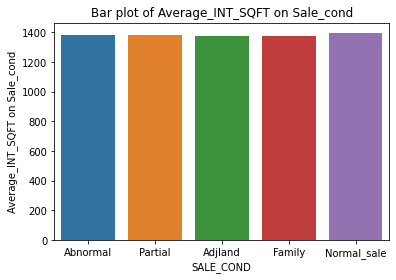

In [53]:
Vizdata["Average_INT_SQFT on Sale_cond"] = Vizdata.groupby('SALE_COND')["INT_SQFT"].transform('mean')
box, ax=plt.subplots()
ax=sns.barplot(x='SALE_COND', y='Average_INT_SQFT on Sale_cond', data= Vizdata)
ax.set_title('Bar plot of Average_INT_SQFT on Sale_cond')
ax.set_xlabel('SALE_COND')
ax.set_ylabel('Average_INT_SQFT on Sale_cond')
plt.show()

In [54]:
Vizdata.head()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AREA_UNIQUE,AGE,Sales_mean,Sales_mean_Buildtype,MZZONE_mean_Buildtype,STREET_mean_Buildtype,UTILITY_AVAIL_mean_Buildtype,PARK_FACIL_mean,AGE_mean,Average_DIST_MAINROAD,Average_INT_SQFT on Sale_cond
0,1004,2011,131,1.0,1.0,3,Abnormal,1,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,380000,144400,7600000,Karapakkam,44,7.340100e+06,1.386984e+07,7.292591e+06,1.105754e+07,1.121002e+07,1.144168e+07,24.808199,99.216867,1380.321758
1,909,2012,70,1.0,1.0,3,Abnormal,1,1995,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200,Adayar,17,9.185668e+06,1.386984e+07,1.176576e+07,1.144462e+07,1.046941e+07,1.144168e+07,23.972868,99.216867,1380.321758
2,1226,2009,84,1.0,1.0,3,Abnormal,1,1992,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.29,237000,74063,7406250,Karapakkam,17,7.340100e+06,9.807998e+06,8.052270e+06,1.144462e+07,1.121002e+07,1.144168e+07,24.808199,99.216867,1380.321758
3,1220,2014,36,2.0,1.0,4,Partial,0,1988,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.32,409027,198316,12394750,Chrompet,26,1.001381e+07,1.386984e+07,1.103997e+07,1.000074e+07,1.090923e+07,1.033805e+07,25.219741,99.674110,1382.757851
4,1167,2007,137,1.0,1.0,3,Partial,0,1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.67,263152,33955,8488790,Chrompet,28,1.001381e+07,9.807998e+06,1.176576e+07,1.000074e+07,1.121002e+07,1.033805e+07,25.219741,99.674110,1382.757851


##Looking for Correlations


In [55]:
corr_matrix = train.corr()

In [56]:
corr_matrix["SALES_PRICE"].sort_values(ascending=False)

SALES_PRICE      1.000000
REG_FEE          0.878457
COMMIS           0.634254
INT_SQFT         0.614438
N_ROOM           0.604861
N_BEDROOM        0.334329
PARK_FACIL       0.141837
N_BATHROOM       0.113643
QS_BEDROOM       0.033269
QS_ROOMS         0.032881
QS_OVERALL       0.032345
DIST_MAINROAD    0.018357
DATE_BUILD       0.011760
DATE_SALE       -0.001329
AGE             -0.011839
QS_BATHROOM     -0.018352
Name: SALES_PRICE, dtype: float64

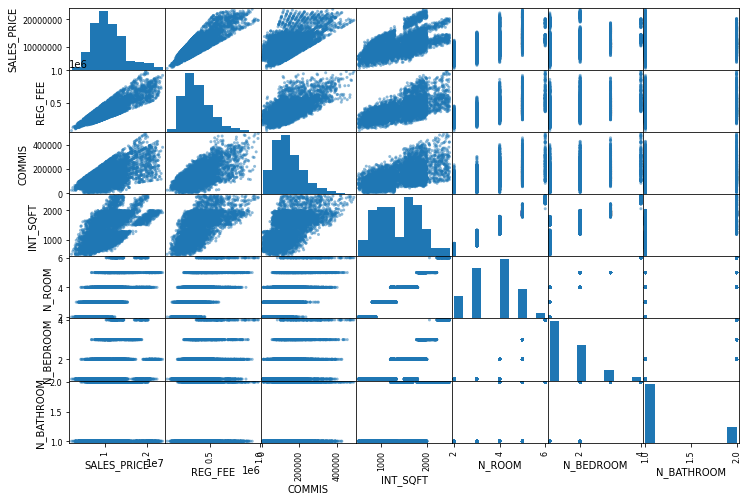

In [57]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["SALES_PRICE", "REG_FEE", "COMMIS",
              "INT_SQFT", "N_ROOM", "N_BEDROOM", "N_BATHROOM"]
scatter_matrix(train[attributes], figsize=(12, 8))
plt.show()

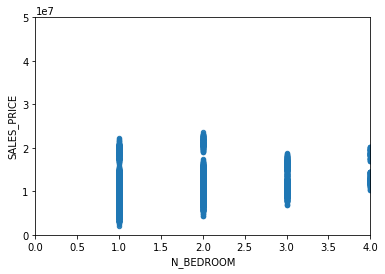

In [58]:
train.plot(kind="scatter", x="N_BEDROOM", y="SALES_PRICE",alpha=0.9)
plt.axis([0, 4, 0, 50000000])
plt.show()

##Experimenting with Attribute Combinations

In [59]:
#train["Total_room"] = train["N_ROOM"]+train["N_BEDROOM"]+train["N_BATHROOM"]

In [60]:
#corr_matrix = train.corr()
#train.info()

In [61]:
#corr_matrix["SALES_PRICE"].sort_values(ascending=False)

# Prepare the Data for Machine Learning Algorithms


In [62]:
train = strat_train_set.drop("SALES_PRICE", axis=1 ) # drop labels for training set
train_labels = strat_train_set["SALES_PRICE"].copy()

##Data Cleaning

Train


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5687 entries, 4357 to 3576
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       5687 non-null   int64  
 1   DATE_SALE      5687 non-null   int64  
 2   DIST_MAINROAD  5687 non-null   int64  
 3   N_BEDROOM      5686 non-null   float64
 4   N_BATHROOM     5683 non-null   float64
 5   N_ROOM         5687 non-null   int64  
 6   SALE_COND      5687 non-null   object 
 7   PARK_FACIL     5687 non-null   int64  
 8   DATE_BUILD     5687 non-null   int64  
 9   BUILDTYPE      5687 non-null   object 
 10  UTILITY_AVAIL  5687 non-null   object 
 11  STREET         5687 non-null   object 
 12  MZZONE         5687 non-null   object 
 13  QS_ROOMS       5687 non-null   float64
 14  QS_BATHROOM    5687 non-null   float64
 15  QS_BEDROOM     5687 non-null   float64
 16  QS_OVERALL     5647 non-null   float64
 17  REG_FEE        5687 non-null   int64  
 18  COMMI

In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
median = train["N_BEDROOM"].median()
train["N_BEDROOM"].fillna(median, inplace=True)

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
median = train["N_BATHROOM"].median()
train["N_BATHROOM"].fillna(median, inplace=True)

In [66]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
median = train["QS_OVERALL"].median()
train["QS_OVERALL"].fillna(median, inplace=True)

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5687 entries, 4357 to 3576
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       5687 non-null   int64  
 1   DATE_SALE      5687 non-null   int64  
 2   DIST_MAINROAD  5687 non-null   int64  
 3   N_BEDROOM      5687 non-null   float64
 4   N_BATHROOM     5687 non-null   float64
 5   N_ROOM         5687 non-null   int64  
 6   SALE_COND      5687 non-null   object 
 7   PARK_FACIL     5687 non-null   int64  
 8   DATE_BUILD     5687 non-null   int64  
 9   BUILDTYPE      5687 non-null   object 
 10  UTILITY_AVAIL  5687 non-null   object 
 11  STREET         5687 non-null   object 
 12  MZZONE         5687 non-null   object 
 13  QS_ROOMS       5687 non-null   float64
 14  QS_BATHROOM    5687 non-null   float64
 15  QS_BEDROOM     5687 non-null   float64
 16  QS_OVERALL     5687 non-null   float64
 17  REG_FEE        5687 non-null   int64  
 18  COMMI

In [68]:
len(train_labels)

5687

#Data Cleaning
Test

In [69]:
test = strat_test_set

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 6725 to 2947
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       1422 non-null   int64  
 1   DATE_SALE      1422 non-null   int64  
 2   DIST_MAINROAD  1422 non-null   int64  
 3   N_BEDROOM      1422 non-null   float64
 4   N_BATHROOM     1421 non-null   float64
 5   N_ROOM         1422 non-null   int64  
 6   SALE_COND      1422 non-null   object 
 7   PARK_FACIL     1422 non-null   int64  
 8   DATE_BUILD     1422 non-null   int64  
 9   BUILDTYPE      1422 non-null   object 
 10  UTILITY_AVAIL  1422 non-null   object 
 11  STREET         1422 non-null   object 
 12  MZZONE         1422 non-null   object 
 13  QS_ROOMS       1422 non-null   float64
 14  QS_BATHROOM    1422 non-null   float64
 15  QS_BEDROOM     1422 non-null   float64
 16  QS_OVERALL     1414 non-null   float64
 17  REG_FEE        1422 non-null   int64  
 18  COMMI

In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
median = test["N_BEDROOM"].median()
test["N_BEDROOM"].fillna(median, inplace=True)

In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
median = test["N_BATHROOM"].median()
test["N_BATHROOM"].fillna(median, inplace=True)

In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
median = test["QS_OVERALL"].median()
test["QS_OVERALL"].fillna(median, inplace=True)

In [74]:
test = strat_test_set.drop("SALES_PRICE", axis=1 ) # drop labels for training set
test_labels = strat_test_set["SALES_PRICE"].copy()

In [75]:
test_labels.head()

6725    11294655
1923    16174900
3548    11650250
4309    11780070
6157    13570940
Name: SALES_PRICE, dtype: int64

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 6725 to 2947
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       1422 non-null   int64  
 1   DATE_SALE      1422 non-null   int64  
 2   DIST_MAINROAD  1422 non-null   int64  
 3   N_BEDROOM      1422 non-null   float64
 4   N_BATHROOM     1422 non-null   float64
 5   N_ROOM         1422 non-null   int64  
 6   SALE_COND      1422 non-null   object 
 7   PARK_FACIL     1422 non-null   int64  
 8   DATE_BUILD     1422 non-null   int64  
 9   BUILDTYPE      1422 non-null   object 
 10  UTILITY_AVAIL  1422 non-null   object 
 11  STREET         1422 non-null   object 
 12  MZZONE         1422 non-null   object 
 13  QS_ROOMS       1422 non-null   float64
 14  QS_BATHROOM    1422 non-null   float64
 15  QS_BEDROOM     1422 non-null   float64
 16  QS_OVERALL     1422 non-null   float64
 17  REG_FEE        1422 non-null   int64  
 18  COMMI

##Handling Text and Categorical Attributes
Train

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

##Number, Onehot and Label

In [78]:
train = strat_train_set.drop("SALES_PRICE", axis=1) # drop labels for training set
train_labels = strat_train_set["SALES_PRICE"].copy()

In [79]:
train_num = train[["INT_SQFT","DATE_SALE","DIST_MAINROAD","PARK_FACIL","N_BEDROOM","N_BATHROOM","N_ROOM","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","REG_FEE","COMMIS", "AGE"]]

In [80]:
train_cat_1hot = train[["SALE_COND","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE","AREA_UNIQUE"]]

In [81]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat_1hot)
train_cat_1hot
train_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Handling Text and Categorical 
Test

In [82]:
test = strat_test_set.drop("SALES_PRICE", axis=1) # drop labels for training set
test_labels = strat_test_set["SALES_PRICE"].copy()

In [83]:
test_num = test[["INT_SQFT","DATE_SALE","DIST_MAINROAD","PARK_FACIL","N_BEDROOM","N_BATHROOM","N_ROOM","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","REG_FEE","COMMIS", "AGE"]]

In [84]:
test_cat_1hot = test[["SALE_COND","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE","AREA_UNIQUE"]]

In [85]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
test_cat_1hot = cat_encoder.fit_transform(test_cat_1hot)
test_cat_1hot
test_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##Transform Pipeline

Train

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])
train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr

array([[-1.15229463,  0.09952932, -1.62654673, ..., -1.21060272,
        -0.87276441, -0.4155453 ],
       [ 0.39774016,  1.45689926,  0.9102793 , ...,  0.53915555,
        -1.01146531, -0.49391393],
       [ 0.64225269,  0.09952932,  0.58014441, ...,  0.63845641,
         0.40939109,  0.75998418],
       ...,
       [ 0.65316843,  0.09952932,  1.48367149, ..., -0.11907767,
         0.41692396,  0.60324692],
       [-0.76369435, -0.35292732, -0.42763579, ..., -1.15592036,
        -0.66080759,  0.60324692],
       [ 0.97627427, -0.35292732, -1.53966912, ...,  0.08689159,
         1.0953501 ,  1.15182734]])

In [87]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs_1hot = ["SALE_COND","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE","AREA_UNIQUE"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat1hot", OneHotEncoder(), cat_attribs_1hot)])

train_prepared = full_pipeline.fit_transform(train)
train_prepared


array([[-1.15229463,  0.09952932, -1.62654673, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39774016,  1.45689926,  0.9102793 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64225269,  0.09952932,  0.58014441, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.65316843,  0.09952932,  1.48367149, ...,  1.        ,
         0.        ,  0.        ],
       [-0.76369435, -0.35292732, -0.42763579, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.97627427, -0.35292732, -1.53966912, ...,  0.        ,
         0.        ,  0.        ]])

In [88]:
train_prepared.shape

(5687, 42)

##Transform pipeline
Test

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])
test_num_tr = num_pipeline.fit_transform(test_num)
test_num_tr

array([[-0.84861789, -0.78656202,  1.68062072, ...,  0.42833684,
        -0.49348226, -1.46679361],
       [ 0.99358377,  0.12761141, -0.4327102 , ...,  1.07552964,
         2.79473041, -0.54868906],
       [-1.25187495,  0.58469812, -0.50315457, ..., -0.60708837,
         0.60284735, -0.1661455 ],
       ...,
       [-1.12186311, -0.3294753 , -0.48554348, ..., -0.23288493,
         0.98238188, -0.93123263],
       [ 0.54184772, -0.3294753 , -1.27804258, ...,  0.5646095 ,
         0.65954468,  0.13988935],
       [-1.34222216,  1.49887155,  1.16989908, ..., -0.8657504 ,
         0.06892479, -0.47218035]])

In [90]:
from sklearn.compose import ColumnTransformer

num_attribs = list(test_num)
cat_attribs_1hot = ["SALE_COND","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE","AREA_UNIQUE"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat1hot", OneHotEncoder(), cat_attribs_1hot)])

test_prepared = full_pipeline.fit_transform(test)
test_prepared

array([[-0.84861789, -0.78656202,  1.68062072, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99358377,  0.12761141, -0.4327102 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.25187495,  0.58469812, -0.50315457, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.12186311, -0.3294753 , -0.48554348, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54184772, -0.3294753 , -1.27804258, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34222216,  1.49887155,  1.16989908, ...,  0.        ,
         0.        ,  0.        ]])

In [91]:
test_prepared.shape

(1422, 42)

# Select and Train a Model


#Models

1) Linear Regression
2) Decision Tree Regression
3) Random Forest Regression
4) XG Boost Regression
5) KNN Regression
Choose the best model based on validation score
On the best model, do hyper-param fitting using cross validation
7) Interpret mode

# Linear Regression
Training and Evaluating on the Training Set


Understanding
Chennai Database
X = train_prepared
y= train_labels

 = test_prepared
   test_label

Refereing Database
Data 1 as Train 

X_train,y_Train
X_test, y_test


In [92]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)
y_pred = lin_reg.predict(train_prepared)
df = pd.DataFrame({'Actual': train_labels, 'Predicted': y_pred})
df

,Actual,Predicted
4357,6568510,6778816.0
5725,12255910,13319488.0
1826,13361380,13899904.0
600,8074850,7518144.0
6531,6076595,6245632.0
...,...,...
4574,18111990,17347072.0
2151,12436280,13106624.0
445,10893375,10358848.0
5424,5564000,5030848.0


In [136]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, y_pred)
lin_rmse= np.sqrt(lin_mse)
lin_rmse

709791.4137563775

In [97]:
from sklearn import metrics

In [139]:
mae_train=metrics.mean_absolute_error(train_labels,y_pred)
mae_train

535683.6666080535

In [140]:
rmse_train=np.sqrt(metrics.mean_squared_error(train_labels,y_pred))
rmse_train

709791.4137563775

In [145]:
mape_train=metrics.mean_absolute_percentage_error(train_labels,y_pred)
mape_train*100

5.339732655960659

# Decision  Tree

In [183]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=30,random_state=42)
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor(max_depth=30, random_state=42)

In [185]:
train_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [103]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [104]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [947065.83156564 915205.05757411 860117.81734592 914961.89815274
 926368.32503581 948092.49878956 884270.88512915 885180.43451029
 994741.52893115 909560.02243714]
Mean: 918556.4299471502
Standard deviation: 36551.29978085758


In [105]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [722531.61869134 689913.37890498 728848.91972199 692432.99997808
 747769.90600624 721099.49377385 726940.60157509 641609.43357248
 761381.92615794 710602.09273776]
Mean: 714313.0371119764
Standard deviation: 31926.251202307478


In [106]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor(random_state=42)

In [107]:
train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

237316.6597633039

In [108]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_prepared, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [669090.38342445 638778.87790118 633459.44875484 690155.37949703
 626273.04123505 615621.80134246 640957.2261972  635119.94934004
 633751.8665756  650779.93627896]
Mean: 643398.7910546812
Standard deviation: 20623.45263125244


In [109]:
scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean     714313.037112
std       33653.223650
min      641609.433572
25%      696975.273168
50%      721815.556233
75%      728371.840185
max      761381.926158
dtype: float64

# Random Forest


In [187]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(train_prepared, train_labels) 

RandomForestRegressor(random_state=0)

In [188]:
y_predrf = regressor.predict(train_prepared)

In [189]:
df = pd.DataFrame({'Actual': train_labels, 'Predicted': y_predrf})
df

,Actual,Predicted
4357,6568510,6747436.30
5725,12255910,12270900.00
1826,13361380,13207568.40
600,8074850,7975185.90
6531,6076595,6496878.20
...,...,...
4574,18111990,18391267.70
2151,12436280,12428546.20
445,10893375,10108848.75
5424,5564000,5494295.00


In [192]:
mape_train=metrics.mean_absolute_percentage_error(train_labels,y_predrf)
mape_train*100

1.924742329117456

#Grid search view

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [122]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 30}

In [123]:
grid_search.best_estimator_

RandomForestRegressor(max_features=12, n_estimators=30, random_state=42)

In [124]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1699399.6241379525 {'max_features': 2, 'n_estimators': 3}
1191963.8838383763 {'max_features': 2, 'n_estimators': 10}
1030944.1263813871 {'max_features': 2, 'n_estimators': 30}
1083328.8733340818 {'max_features': 4, 'n_estimators': 3}
806816.3241234387 {'max_features': 4, 'n_estimators': 10}
721970.9091104786 {'max_features': 4, 'n_estimators': 30}
946094.1358480285 {'max_features': 6, 'n_estimators': 3}
725158.6347643203 {'max_features': 6, 'n_estimators': 10}
651107.1747536921 {'max_features': 6, 'n_estimators': 30}
902278.1347878827 {'max_features': 8, 'n_estimators': 3}
681505.870524215 {'max_features': 8, 'n_estimators': 10}
619453.5876096451 {'max_features': 8, 'n_estimators': 30}
850473.2422529819 {'max_features': 10, 'n_estimators': 3}
658185.5576083981 {'max_features': 10, 'n_estimators': 10}
616230.1660000902 {'max_features': 10, 'n_estimators': 30}
851240.4464607901 {'max_features': 12, 'n_estimators': 3}
684250.2066637701 {'max_features': 12, 'n_estimators': 10}
614229.63308

#RANDOM SEARCH

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=18),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_prepared, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff8ed9d09d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff8ed9d0990>},
                   random_state=42, scoring='neg_mean_squared_error')

In [117]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

597255.1142858433 {'max_features': 7, 'n_estimators': 180}
596329.7335802834 {'max_features': 15, 'n_estimators': 107}
590922.7576122939 {'max_features': 8, 'n_estimators': 189}
599365.5521703699 {'max_features': 7, 'n_estimators': 122}
596614.0820477967 {'max_features': 11, 'n_estimators': 88}
690196.9456405853 {'max_features': 4, 'n_estimators': 104}
797360.1438858174 {'max_features': 3, 'n_estimators': 150}
997941.6725535342 {'max_features': 2, 'n_estimators': 88}
591274.2356601995 {'max_features': 12, 'n_estimators': 158}
612926.2383583216 {'max_features': 6, 'n_estimators': 130}


## Analyze the Best Models and Their Errors

In [125]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13417754, 0.00311789, 0.00318582, 0.00475083, 0.01382583,
       0.00737586, 0.06253121, 0.00247843, 0.0027393 , 0.00278649,
       0.00247563, 0.00261188, 0.33507875, 0.06426142, 0.00253055,
       0.00040251, 0.00066139, 0.00038906, 0.0003668 , 0.00052017,
       0.13907189, 0.02556968, 0.01205423, 0.00067664, 0.00040916,
       0.0004803 , 0.0017372 , 0.00210318, 0.00048763, 0.00621601,
       0.00306897, 0.00054312, 0.00185356, 0.00162622, 0.00631135,
       0.00288358, 0.04013154, 0.00918552, 0.0069234 , 0.06131868,
       0.02189344, 0.00918737])

In [126]:
attributes = num_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33507875323178515, 'REG_FEE'),
 (0.13417754480372368, 'INT_SQFT'),
 (0.06426142433582589, 'COMMIS'),
 (0.06253120535886666, 'N_ROOM'),
 (0.013825834916865296, 'N_BEDROOM'),
 (0.007375856799509371, 'N_BATHROOM'),
 (0.004750826045217663, 'PARK_FACIL'),
 (0.0031858173271801884, 'DIST_MAINROAD'),
 (0.003117888714446513, 'DATE_SALE'),
 (0.0027864898116214953, 'QS_BATHROOM'),
 (0.0027393038365371527, 'QS_ROOMS'),
 (0.0026118811715799255, 'QS_OVERALL'),
 (0.002530545578730869, 'AGE'),
 (0.002478427085081761, 'DATE_BUILD'),
 (0.0024756319225335962, 'QS_BEDROOM')]

# KNN Regression

In [205]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_prepared, train_labels)  #fit the model
    pred=model.predict(train_prepared) #make prediction on test set
    error = sqrt(mean_squared_error(train_labels,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 955643.0918671328
RMSE value for k=  3 is: 1031628.2127215684
RMSE value for k=  4 is: 1081908.6198487126
RMSE value for k=  5 is: 1111931.4844562903
RMSE value for k=  6 is: 1139519.1117464078
RMSE value for k=  7 is: 1160651.5421094224
RMSE value for k=  8 is: 1183428.8522788414
RMSE value for k=  9 is: 1200005.7238553376
RMSE value for k=  10 is: 1217545.0172078314
RMSE value for k=  11 is: 1230632.7397206477
RMSE value for k=  12 is: 1243273.3679508774
RMSE value for k=  13 is: 1256476.9738703356
RMSE value for k=  14 is: 1269585.8951875113
RMSE value for k=  15 is: 1284178.6535738874
RMSE value for k=  16 is: 1294954.02702764
RMSE value for k=  17 is: 1310124.418301744
RMSE value for k=  18 is: 1317728.3502622906
RMSE value for k=  19 is: 1325276.5346579077
RMSE value for k=  20 is: 1335474.3350409076


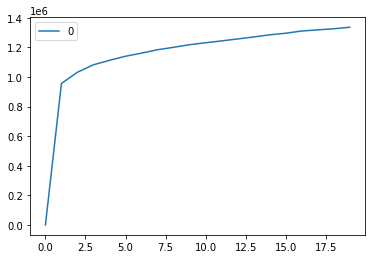

In [209]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [210]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(train_prepared, train_labels)
model.best_params_


{'n_neighbors': 8}

# Gradiant Boost


In [202]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(train_prepared, train_labels)
y_predgb = gbrt.predict(train_prepared)
df = pd.DataFrame({'Actual': train_labels, 'Predicted': y_predgb})
df

,Actual,Predicted
4357,6568510,7.879813e+06
5725,12255910,1.378837e+07
1826,13361380,1.378837e+07
600,8074850,7.879813e+06
6531,6076595,7.879813e+06
...,...,...
4574,18111990,2.122056e+07
2151,12436280,1.206684e+07
445,10893375,8.491733e+06
5424,5564000,5.405800e+06


In [203]:
mape_train=metrics.mean_absolute_percentage_error(train_labels,y_predgb)
mape_train*100

12.1470064339889

# XG Boost

In [200]:
import xgboost
xgb_reg=xgboost.XGBRegressor()
xgb_reg.fit(train_prepared, train_labels)
y_predxgb = xgb_reg.predict(train_prepared)
df = pd.DataFrame({'Actual': train_labels, 'Predicted': y_predxgb})
df

[11:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Actual,Predicted
4357,6568510,7060011.5
5725,12255910,12448394.0
1826,13361380,13105696.0
600,8074850,7654178.0
6531,6076595,6470314.0
...,...,...
4574,18111990,19002608.0
2151,12436280,12567812.0
445,10893375,9514454.0
5424,5564000,5597309.0


In [211]:
mape_train=metrics.mean_absolute_percentage_error(train_labels,y_predxgb)
mape_train*100

4.818431891576217

# Statistics

In [111]:
import statsmodels
import statsmodels.api

In [112]:
mlr_model=statsmodels.api.OLS(train_labels,statsmodels.api.add_constant(train_prepared)).fit()

In [113]:
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SALES_PRICE   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     4395.
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:29:09   Log-Likelihood:                -84689.
No. Observations:                5687   AIC:                         1.694e+05
Df Residuals:                    5651   BIC:                         1.697e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.278e+06   5698.446    750.663      0.000    4.27e+06    4.29e+06
x1           1.31e+06   4.23e+04     30.990      0.000    1.23e+06    1.39e+06
x2         -1.329e+04   1.03e+04     -1.292      0.196   -3.34e+04    6874.882
x3          5758.8181   9465.899      0.608      0.543   -1.28e+04    2.43e+04
x4          3.821e+05      1e+04     38.135      0.000    3.62e+05    4.02e+05
x5          1.138e+05   3.45e+04      3.295      0.001    4.61e+04    1.81e+05
x6         -1.385e+05   1.78e+04     -7.781      0.000   -1.73e+05   -1.04e+05
x7          2.092e+05   4.35e+04      4.810      0.000    1.24e+05    2.95e+05
x8          4082.3692   4929.789      0.828      0.408   -5581.909    1.37e+04
x9         -4.865e+04   2.62e+04     -1.858      0.063      -1e+05    2669.841
x10        -6.093e+04   2.81e+04     -2.172      0.030   -1.16e+05   -5932.932
x11        -4.726e+04   3.19e+04     -1.481      0.139    -1.1e+05    1.53e+04
x12         1.176e+05   4.81e+04      2.447      0.014    2.34e+04    2.12e+05
x13         8.639e+05   2.29e+04     37.690      0.000    8.19e+05    9.09e+05
x14         1.651e+05   1.39e+04     11.849      0.000    1.38e+05    1.92e+05
x15        -6331.0025   4760.061     -1.330      0.184   -1.57e+04    3000.544
x16         8.592e+05   1.89e+04     45.394      0.000    8.22e+05    8.96e+05
x17         1.125e+06   1.91e+04     59.013      0.000    1.09e+06    1.16e+06
x18         7.447e+05    1.9e+04     39.090      0.000    7.07e+05    7.82e+05
x19         8.976e+05    1.9e+04     47.245      0.000     8.6e+05    9.35e+05
x20          6.51e+05    1.9e+04     34.286      0.000    6.14e+05    6.88e+05
x21          3.61e+06   2.15e+04    168.246      0.000    3.57e+06    3.65e+06
x22         6.851e+04   1.71e+04      4.009      0.000     3.5e+04    1.02e+05
x23         5.987e+05    1.5e+04     39.834      0.000    5.69e+05    6.28e+05
x24         1.566e+06    1.5e+04    104.462      0.000    1.54e+06     1.6e+06
x25         1.321e+06   1.63e+04     80.897      0.000    1.29e+06    1.35e+06
x26          1.39e+06   1.25e+04    111.491      0.000    1.37e+06    1.41e+06
x27         1.851e+06   1.37e+04    135.071      0.000    1.82e+06    1.88e+06
x28         9.724e+05   1.52e+04     64.164      0.000    9.43e+05       1e+06
x29         1.454e+06   1.34e+04    108.372      0.000    1.43e+06    1.48e+06
x30        -3.745e+05   3.29e+04    -11.388      0.000   -4.39e+05    -3.1e+05
x31         1.468e+04   3.17e+04      0.463      0.643   -4.75e+04    7.68e+04
x32         4.928e+05   3.26e+04     15.116      0.000    4.29e+05    5.57e+05
x33         9.015e+05   2.06e+04     43.726      0.000    8.61e+05    9.42e+05
x34         1.382e+06   2.12e+04     65.277      0.000    1.34e+06    1.42e+06
x35         1.861e+06   2.24e+04     83.035      0.000    1.82e+06    1.91e+06
x3

## Final test

In [127]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("SALES_PRICE", axis=1)
y_test = strat_test_set["SALES_PRICE"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

598284.4283259002

#RIDGE REGRESSION

In [128]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True)

In [ ]:
cv_results = cross_validate(regressor, train_labels, train_predictions, cv=10, scoring = "r2" , return_train_score=True)
cv_results['test_score'].mean(), cv_results['train_score'].mean()

In [130]:
from sklearn.linear_model import Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, train_labels, train_predictions, cv=10, scoring = "neg_mean_squared_error" , return_train_score=True)
  print("Alpha : ", alpha, -cv_results['test_score'].mean(), -cv_results['train_score'].mean())

Alpha :  0.001 nan nan
Alpha :  0.002 nan nan
Alpha :  0.003 nan nan
Alpha :  0.005 nan nan
Alpha :  0.01 nan nan


# Fine-Tune Your Model
